## Heart Disease Prediction

1. Loading the Data
2. Data Exploration
3. Data Preprocessing
4. Model Building
5. Model Evaluation
6. Model Testing

### 1. Loading the Data

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the datasets
train = pd.read_csv('/kaggle/input/dataanalyticscoaching/train.csv')
test = pd.read_csv('/kaggle/input/dataanalyticscoaching/test.csv')
train.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,47,1,2,130,253,0,1,179,0,0.0,2,0,2,1
1,2,62,0,0,160,164,0,0,145,0,6.2,0,3,3,0
2,3,51,0,2,140,308,0,0,142,0,1.5,2,1,2,1
3,4,51,0,2,120,295,0,0,157,0,0.6,2,0,2,1
4,5,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1


In [3]:
test.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,213,58,1,0,100,234,0,1,156,0,0.1,2,1,3
1,214,54,0,2,135,304,1,1,170,0,0.0,2,0,2
2,215,57,0,0,128,303,0,0,159,0,0.0,2,1,2
3,216,64,1,0,120,246,0,0,96,1,2.2,0,1,2
4,217,52,1,0,128,204,1,1,156,1,1.0,1,0,0


### 2. Data Exploration

In [4]:
# Check columns
train.columns

Index(['id', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
test.columns

Index(['id', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [6]:
# Check the dataset information
train.info()
# take-way: Non of the columns have missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        212 non-null    int64  
 1   age       212 non-null    int64  
 2   sex       212 non-null    int64  
 3   cp        212 non-null    int64  
 4   trestbps  212 non-null    int64  
 5   chol      212 non-null    int64  
 6   fbs       212 non-null    int64  
 7   restecg   212 non-null    int64  
 8   thalach   212 non-null    int64  
 9   exang     212 non-null    int64  
 10  oldpeak   212 non-null    float64
 11  slope     212 non-null    int64  
 12  ca        212 non-null    int64  
 13  thal      212 non-null    int64  
 14  target    212 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 25.0 KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        91 non-null     int64  
 1   age       91 non-null     int64  
 2   sex       91 non-null     int64  
 3   cp        91 non-null     int64  
 4   trestbps  91 non-null     int64  
 5   chol      91 non-null     int64  
 6   fbs       91 non-null     int64  
 7   restecg   91 non-null     int64  
 8   thalach   91 non-null     int64  
 9   exang     91 non-null     int64  
 10  oldpeak   91 non-null     float64
 11  slope     91 non-null     int64  
 12  ca        91 non-null     int64  
 13  thal      91 non-null     int64  
dtypes: float64(1), int64(13)
memory usage: 10.1 KB


In [8]:
# Look for duplicates
train.duplicated().sum()

0

In [9]:
test.duplicated().sum()

0

In [10]:
# Find unique values count and store them in a dictionary
unique_count = train.nunique()
inx = list(unique_count.index)
res = dict(zip(inx,unique_count)) 

In [11]:
# Find out categorical variables
cat_attr = []
for key, val in res.items(): 
    if val <= 5 and key != 'target':
            print(key, ":", val)
            cat_attr.append(key)
print('Number of Categorical attributes:', len(cat_attr))
cat_feat = train[cat_attr]

sex : 2
cp : 4
fbs : 2
restecg : 3
exang : 2
slope : 3
ca : 5
thal : 4
Number of Categorical attributes: 8


In [12]:
# Find out numerical attributes
num_attr = set(train.columns) - set(cat_attr)
num_feat = train[num_attr]
num_attr

{'age', 'chol', 'id', 'oldpeak', 'target', 'thalach', 'trestbps'}

In [13]:
train['target'].value_counts()

1    116
0     96
Name: target, dtype: int64

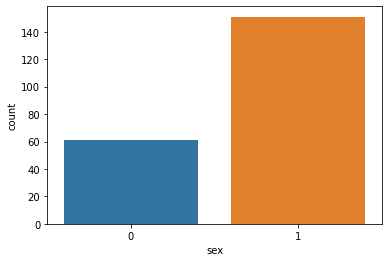

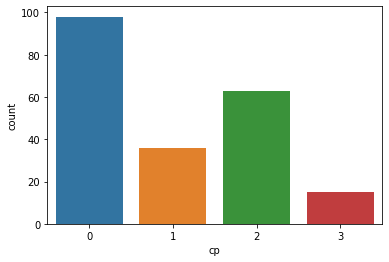

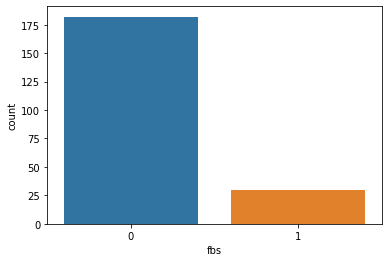

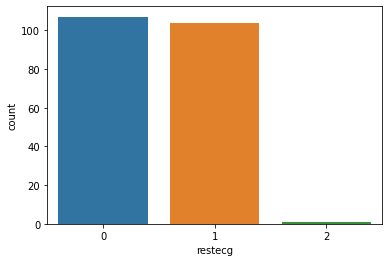

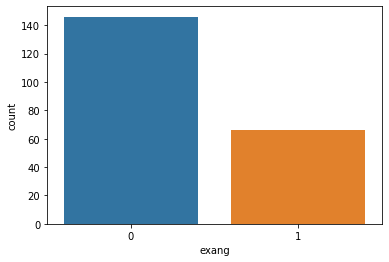

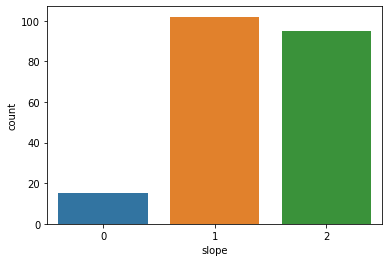

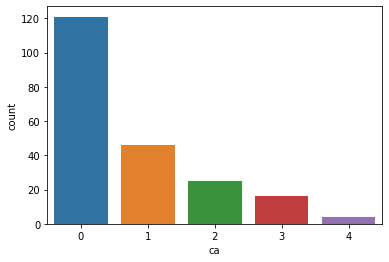

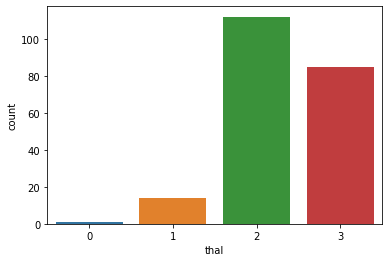

In [14]:
for attr in cat_attr:
    sns.countplot(x = attr, data = train)
    plt.show()

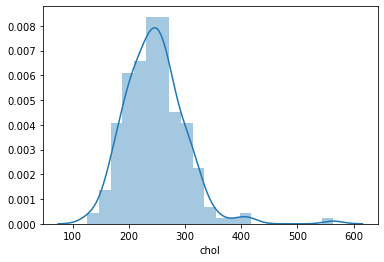

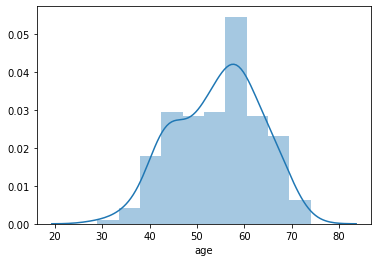

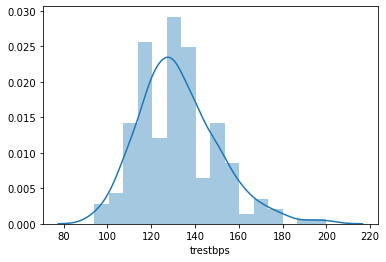

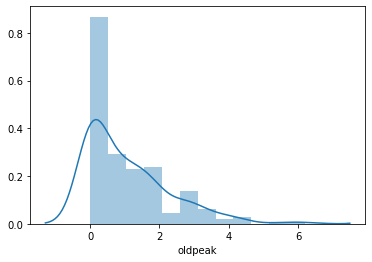

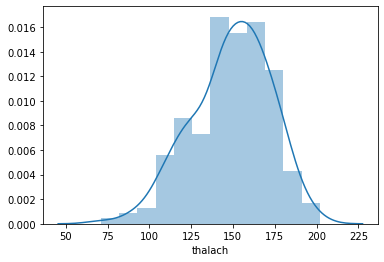

In [15]:
for attr in num_attr:
    if attr == 'target' or attr == 'id':
        pass
    else:
        sns.distplot(train[attr])
        plt.show()

take-away: 
1. Excpet oldpeak every attribute more or less gussian distibuted
2. Oldpeak data left skewed

In [16]:
res = train.groupby(['target', 'sex'])['sex'].count()
res

target  sex
0       0      15
        1      81
1       0      46
        1      70
Name: sex, dtype: int64

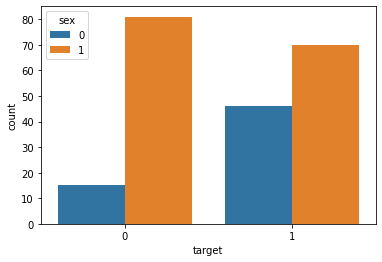

In [17]:
sns.countplot(x = 'target', hue ='sex', data = train)

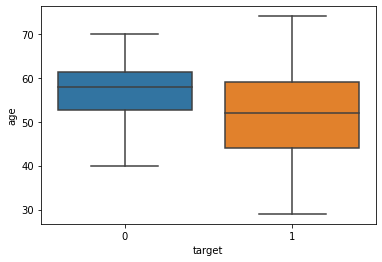

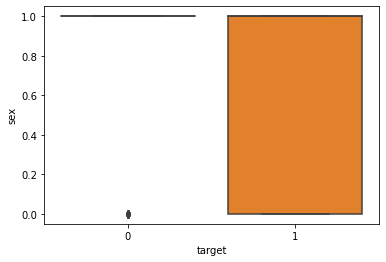

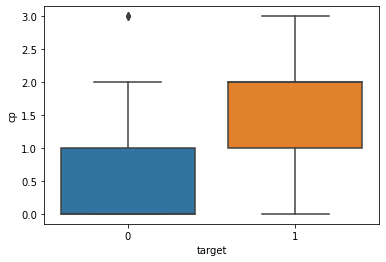

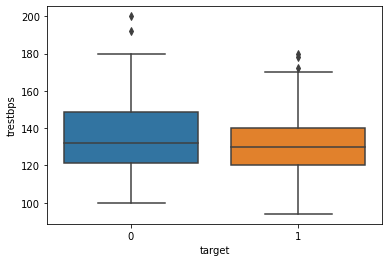

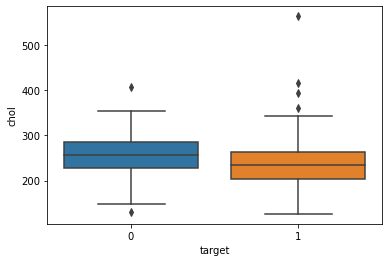

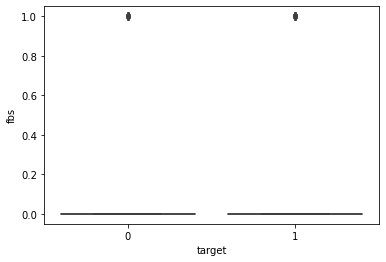

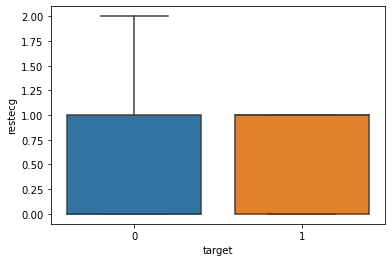

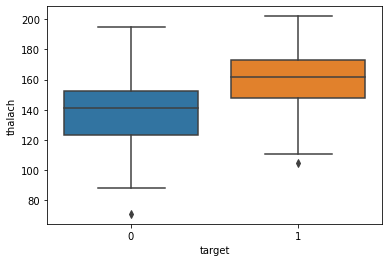

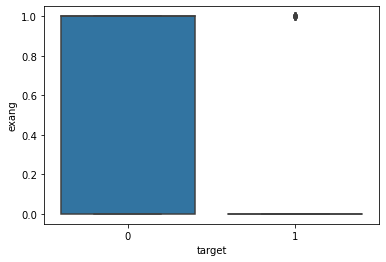

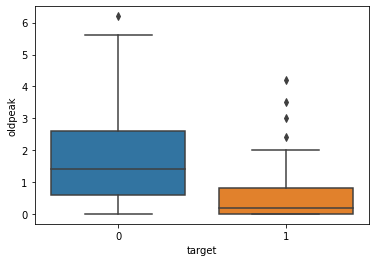

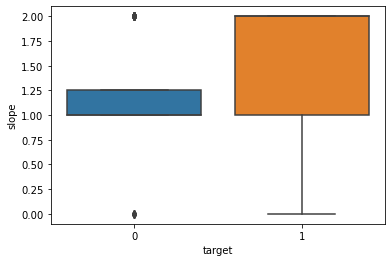

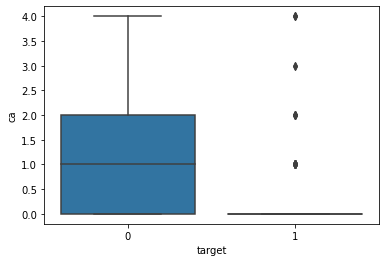

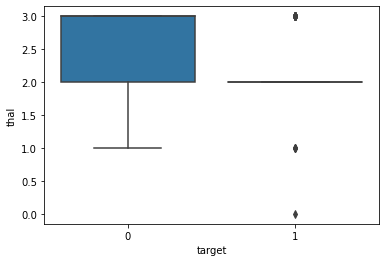

In [18]:
for attr in train:
    if attr == 'id' or attr == 'target':
        pass
    else:
        sns.boxplot(x = 'target', y = attr, data = train)
        plt.show()

In [19]:
num_feat.corr()

,chol,age,id,trestbps,oldpeak,thalach,target
chol,1.000000,0.244273,0.041371,0.121587,0.131542,-0.050568,-0.123622
age,0.244273,1.000000,0.021665,0.261401,0.237869,-0.404885,-0.250679
id,0.041371,0.021665,1.000000,-0.111167,-0.068799,-0.070194,-0.036698
trestbps,0.121587,0.261401,-0.111167,1.000000,0.160138,-0.023714,-0.167087
oldpeak,0.131542,0.237869,-0.068799,0.160138,1.000000,-0.345036,-0.444457
thalach,-0.050568,-0.404885,-0.070194,-0.023714,-0.345036,1.000000,0.460335
target,-0.123622,-0.250679,-0.036698,-0.167087,-0.444457,0.460335,1.000000


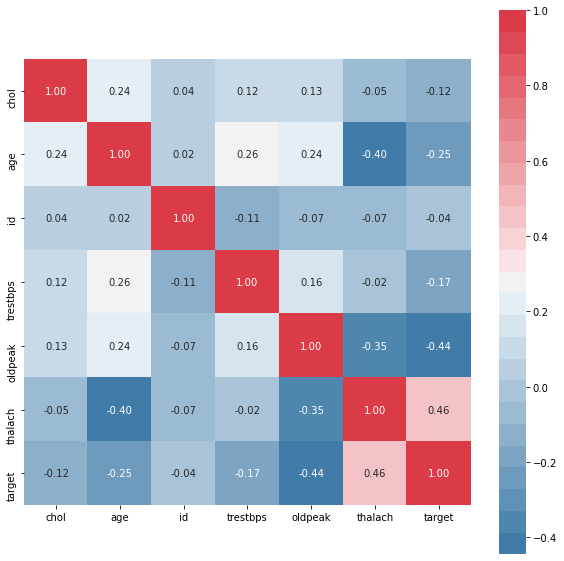

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(num_feat.corr(), 
            annot=True,
            fmt='.2f',
            cmap=sns.diverging_palette(240, 10, n=25),
            square=True)

### 3. Data Preprocessing

In [21]:
num_attr.difference_update({'id', 'target'})

In [22]:
cat_attr = list(cat_attr)
num_attr= list(num_attr)
X_train = train[cat_attr + num_attr]
y_train = train['target']

In [23]:
X_train

,sex,cp,fbs,restecg,exang,slope,ca,thal,chol,age,trestbps,oldpeak,thalach
0,1,2,0,1,0,2,0,2,253,47,130,0.0,179
1,0,0,0,0,0,0,3,3,164,62,160,6.2,145
2,0,2,0,0,0,2,1,2,308,51,140,1.5,142
3,0,2,0,0,0,2,0,2,295,51,120,0.6,157
4,0,2,0,1,0,1,0,2,220,39,138,0.0,152
...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,1,1,0,1,0,1,4,3,220,58,125,0.4,144
208,1,2,0,0,0,1,0,3,258,54,120,0.4,147
209,1,2,0,0,0,1,1,3,230,58,112,2.5,165
210,1,3,1,0,0,1,1,2,234,69,160,0.1,131


In [24]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler

In [25]:
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X[self.attribute_names].values

In [26]:
num_pipeline = Pipeline([
                            ('selector', DataFrameSelector(num_attr)),
                            ('std_scaler', StandardScaler())
                        ])
cat_pipeline = Pipeline([
                            ('selector', DataFrameSelector(cat_attr)),
                        ])

In [27]:
num_pipeline.fit_transform(X_train).shape

(212, 5)

In [28]:
cat_pipeline.fit_transform(X_train).shape

(212, 8)

In [29]:
full_pipeline = FeatureUnion(transformer_list=[
                                ('num_pipeline', num_pipeline),
                                ('cat_pipeline', cat_pipeline)
                            ])

In [30]:
full_pipeline.fit_transform(X_train).shape

(212, 13)

In [31]:
X_prep_train = full_pipeline.fit_transform(X_train)

### 4. Model Building

In [32]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, log_loss, confusion_matrix
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV

In [33]:
# Create a Dataframe to store the model accuracy
acc_df = pd.DataFrame([], columns=['Algo', 'Train_acc', 'Val_acc', 'Log_loss'])

In [35]:
# Create a Param and find best param, CV score, accuracy, Log loss
param_grid = { 
                'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
                'C':[0.3, 0.4, 0.5, 0.8, 1, 2],
                'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
                'max_iter' : [5,10,20,30]
             }
LR_clf = LogisticRegression()
kfold = KFold(n_splits=5)
grid_search = GridSearchCV(LR_clf, param_grid, cv=kfold, scoring='accuracy', verbose=1)

grid_search.fit(X_prep_train, y_train)

print(grid_search.best_params_)

LR_clf = grid_search.best_estimator_
scores = cross_val_score(LR_clf, X_prep_train, y_train, scoring='accuracy', cv=kfold)

LR_clf.fit(X_prep_train, y_train)
y_pred = LR_clf.predict(X_prep_train)
acc = accuracy_score(y_train, y_pred)
loss = log_loss(y_train, y_pred)

row = {'Algo': 'LR','Train_acc':np.round(acc,2),'Val_acc':np.round(np.mean(scores),3), 'Log_loss':np.round(loss,2)}
acc_df = acc_df.append(row, ignore_index = True)

SyntaxError: invalid syntax (<ipython-input-35-be3aca449ecf>, line 22)

### 5. Model Evaluation

In [ ]:
# Print the accuracy df
acc_df

In [ ]:
# Print confusion matrix
confusion_matrix(y_train, y_pred)

### 6. Model Testing

In [ ]:
# test the model
X_test = test.drop(columns=['id'])
X_test = full_pipeline.fit_transform(X_test)
y_pred = LR_clf.predict(X_test)
y_pred

In [ ]:
# Create submission file
submission = pd.DataFrame({
        "id": test['id'],
        "target": y_pred
    })

submission.to_csv('_sub.csv',index=False)
submission.head()